In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Embedding, GlobalMaxPooling1D, Dropout
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import scipy
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors
from sklearn.model_selection import StratifiedKFold
from util import plot_history
import feature_builder

Cargo datasets

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Armo features

In [3]:
X_train = feature_builder.process_dataset(train_df)
y_train = train_df['target'].values

In [4]:
X_train.columns

Index(['text_embedding_0', 'text_embedding_1', 'text_embedding_2',
       'text_embedding_3', 'text_embedding_4', 'text_embedding_5',
       'text_embedding_6', 'text_embedding_7', 'text_embedding_8',
       'text_embedding_9',
       ...
       'location_length', 'text_word_count', 'hashtag_count', 'mention_count',
       'char_count', 'exclamation_count', 'interrogation_count', 'url_count',
       'word_count', 'unique_word_count'],
      dtype='object', length=313)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                20096     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 24,321
Trainable params: 24,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
191/191 [==============================] - 0s 2ms/step - loss: 1.1749 - accuracy: 0.5504 - val_loss: 0.6167 - val_accuracy: 0.6861
Epoch 2/50
191/191 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.6057 - val_

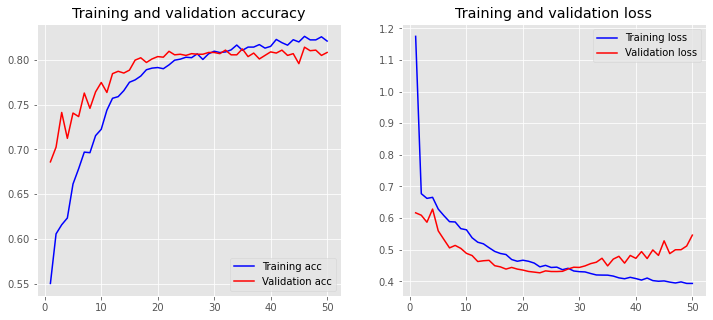

In [15]:
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = create_model()
history = model.fit(X_train, y_train, epochs=20, shuffle=False, validation_split=0.2)
plot_history(history)

In [10]:
test = feature_builder.process_dataset(test_df)
prediction = model.predict_classes(test)
pd.Series([x[0] for x in prediction]).value_counts()

KeyError: "['target'] not found in axis"

Calculemos el test para kaggle

In [34]:
ids = test_df['id']

final_test = feature_builder.process_dataset(test_df)
prediction = model.predict_classes(final_test)
final_df = pd.DataFrame({'target': [x[0] for x in prediction]}, index=ids)
final_df

,target
id,
0,0
2,1
3,1
9,1
11,1
...,...
10861,1
10865,1
10868,1


In [35]:
final_df['target'].value_counts()

0    2005
1    1258
Name: target, dtype: int64

In [36]:
final_df.count()

target    3263
dtype: int64

In [37]:
final_df.to_csv('nn.csv')